In [38]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
import matplotlib.pyplot as plt

In [39]:
data = keras.datasets.mnist
(X_train,y_train),(X_test,y_test) = data.load_data()

In [40]:
X_train.shape

(60000, 28, 28)

In [41]:
X_test.shape

(10000, 28, 28)

In [42]:
y_train.shape

(60000,)

In [43]:
y_test.shape

(10000,)

In [44]:
X_test[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 116, 125, 171,
        255, 255, 150,  93,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253,
        253, 253, 253, 218,  30,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253, 213,
        142, 176, 253, 253, 122,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [45]:
X_train = X_train/255
X_test = X_test/255

In [46]:
X_test[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [47]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

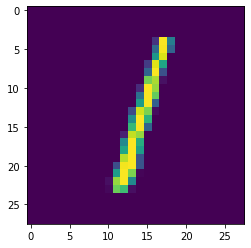

In [48]:
plt.imshow(X_test[2])

In [49]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

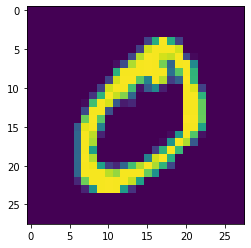

In [50]:
plt.imshow(X_train[1])

In [51]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [54]:
model.fit(X_train,y_train,epochs=10,validation_split=.2)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2814 - accuracy: 0.9208 - val_loss: 0.1584 - val_accuracy: 0.9539
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1245 - accuracy: 0.9636 - val_loss: 0.1127 - val_accuracy: 0.9667
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0854 - accuracy: 0.9737 - val_loss: 0.0999 - val_accuracy: 0.9699
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0635 - accuracy: 0.9811 - val_loss: 0.0952 - val_accuracy: 0.9712
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0467 - accuracy: 0.9859 - val_loss: 0.0905 - val_accuracy: 0.9734
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0376 - accuracy: 0.9887 - val_loss: 0.0910 - val_accuracy: 0.9741
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0295 - accuracy: 0.9909 - val_loss: 0.0981 - val_accuracy:

In [55]:
loss,accuracy = model.evaluate(X_test,y_test)
print("accuracy = ",accuracy)
print("loss = ",loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0822 - accuracy: 0.9788
accuracy =  0.9787999987602234
loss =  0.08222047984600067


In [56]:
model.predict(X_test[1256].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 112ms/step


array([2], dtype=int64)

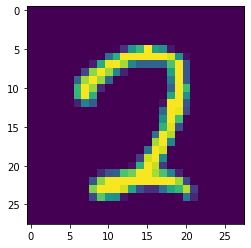

In [57]:
plt.imshow(X_test[1256])

In [58]:
import cv2 as cv
import numpy as np

In [59]:
for x in range(0,10):
    img = cv.imread(f'{x}.png')[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print("Predict = ",np.argmax(prediction))

1/1 [==============================] - 0s 80ms/step
Predict =  0
1/1 [==============================] - 0s 24ms/step
Predict =  1
1/1 [==============================] - 0s 32ms/step
Predict =  2
1/1 [==============================] - 0s 40ms/step
Predict =  3
1/1 [==============================] - 0s 24ms/step
Predict =  4
1/1 [==============================] - 0s 24ms/step
Predict =  5
1/1 [==============================] - 0s 40ms/step
Predict =  6
1/1 [==============================] - 0s 32ms/step
Predict =  7
1/1 [==============================] - 0s 24ms/step
Predict =  8
1/1 [==============================] - 0s 24ms/step
Predict =  9


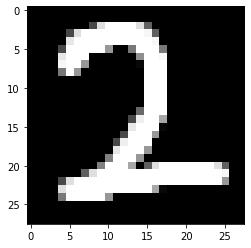

In [60]:
z = 2
img_show = cv.imread(f'{z}.png')
img_show = np.invert(img_show)
plt.imshow(img_show)